In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [2]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt


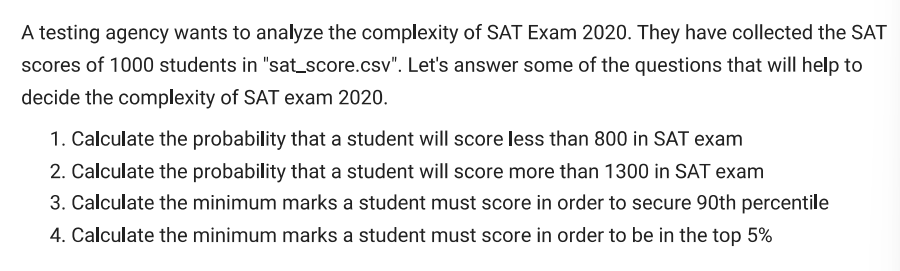

In [ ]:
# Given data
sat_mean = 1000
sat_std_dev = 200
sat_highest_score = 1350

act_mean = 20
act_std_dev = 5
act_highest_score = 30

In [3]:
# Load the dataset
sat_scores_data = pd.read_csv('/content/sat score.csv')

In [4]:
# Extract SAT scores
sat_scores = sat_scores_data['score']

In [5]:
# 1. Analyze SAT Exam complexity
# Q1. Probability that a student scores less than 800
prob_less_800 = np.mean(sat_scores < 800)

In [6]:
# Q2. Probability that a student scores more than 1300
prob_more_1300 = np.mean(sat_scores > 1300)

In [7]:
# Q3. Minimum marks to secure 90th percentile
percentile_90 = np.percentile(sat_scores, 90)

In [8]:
# Q4. Minimum marks to be in top 5%
percentile_95 = np.percentile(sat_scores, 95)


In [9]:
# Display results
print(f"Probability that a student scores less than 800: {prob_less_800}")
print(f"Probability that a student scores more than 1300: {prob_more_1300}")
print(f"Minimum marks to secure 90th percentile: {percentile_90}")
print(f"Minimum marks to secure top 5%: {percentile_95}")

Probability that a student scores less than 800: 0.157
Probability that a student scores more than 1300: 0.068
Minimum marks to secure 90th percentile: 1269.0
Minimum marks to secure top 5%: 1338.1


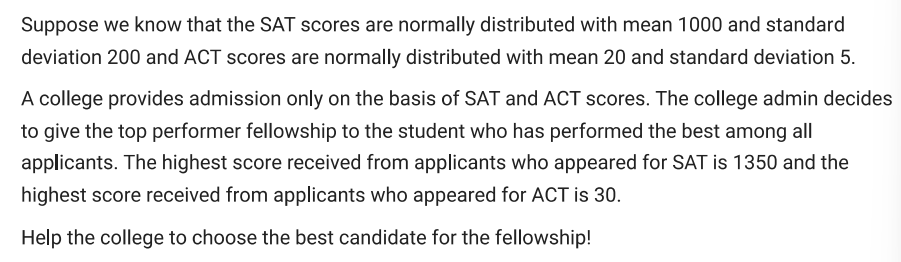

In [10]:
# 2. Compare SAT and ACT top scores
# SAT details
sat_mean = 1000
sat_std = 200
sat_top_score = 1350

In [11]:
# ACT details
act_mean = 20
act_std = 5
act_top_score = 30

In [13]:
# Z-scores for SAT and ACT top performers
z_sat = (sat_top_score - sat_mean) / sat_std
z_act = (act_top_score - act_mean) / act_std

In [14]:
# Display Z-scores
print(f"Z-score for SAT top performer: {z_sat}")
print(f"Z-score for ACT top performer: {z_act}")

Z-score for SAT top performer: 1.75
Z-score for ACT top performer: 2.0


In [27]:
# Convert z-scores to probabilities
prob_sat = norm.cdf(z_sat)
prob_act = norm.cdf(z_act)

In [28]:
# Determine the top performer
if prob_sat > prob_act:
    best_candidate = "SAT candidate"
else:
    best_candidate = "ACT candidate"

In [15]:
# 3. Visualize normal distribution for SAT and ACT
x_sat = np.linspace(sat_mean - 4*sat_std, sat_mean + 4*sat_std, 1000)
y_sat = stats.norm.pdf(x_sat, sat_mean, sat_std)

In [16]:
x_act = np.linspace(act_mean - 4*act_std, act_mean + 4*act_std, 1000)
y_act = stats.norm.pdf(x_act, act_mean, act_std)

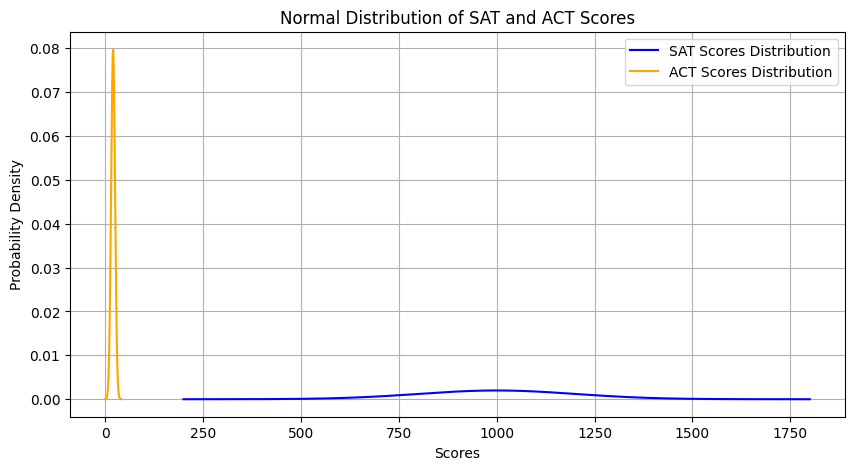

In [17]:
plt.figure(figsize=(10, 5))
plt.plot(x_sat, y_sat, label="SAT Scores Distribution", color='blue')
plt.plot(x_act, y_act, label="ACT Scores Distribution", color='orange')
plt.title("Normal Distribution of SAT and ACT Scores")
plt.xlabel("Scores")
plt.ylabel("Probability Density")
plt.legend()
plt.grid(True)
plt.show()

In [18]:
# Conclusion: Based on Z-scores, determine the top performer
if z_sat > z_act:
    print("The SAT top performer should receive the fellowship.")
else:
    print("The ACT top performer should receive the fellowship.")

The ACT top performer should receive the fellowship.


In [30]:
# Print results
print(f"Z-score for SAT highest score: {z_sat:.3f}")
print(f"Percentile for SAT highest score: {prob_sat * 100:.2f}%")
print(f"Z-score for ACT highest score: {z_act:.3f}")
print(f"Percentile for ACT highest score: {prob_act * 100:.2f}%")
print(f"The best candidate for the fellowship is the {best_candidate}.")

Z-score for SAT highest score: 1.750
Percentile for SAT highest score: 95.99%
Z-score for ACT highest score: 2.000
Percentile for ACT highest score: 97.72%
The best candidate for the fellowship is the ACT candidate.


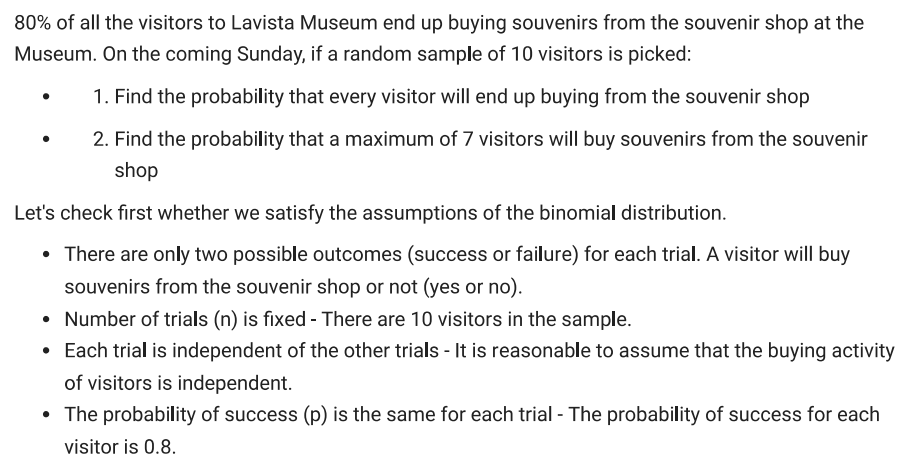

In [19]:
from scipy.stats import binom

In [20]:
# Given data
n = 10  # Number of trials (visitors)
p = 0.8  # Probability of success (buying souvenirs)

In [21]:
# 1. Probability that every visitor will end up buying from the souvenir shop
prob_all_buy = binom.pmf(n, n, p)


In [22]:
# 2. Probability that a maximum of 7 visitors will buy souvenirs
prob_max_7 = binom.cdf(7, n, p)

In [23]:
print(f"1. Probability that every visitor will buy souvenirs: {prob_all_buy:.4f}")
print(f"2. Probability that a maximum of 7 visitors will buy souvenirs: {prob_max_7:.4f}")

1. Probability that every visitor will buy souvenirs: 0.1074
2. Probability that a maximum of 7 visitors will buy souvenirs: 0.3222


In [25]:
# Generate data for visualization
x = np.arange(0, n + 1)
y = binom.pmf(x, n, p)

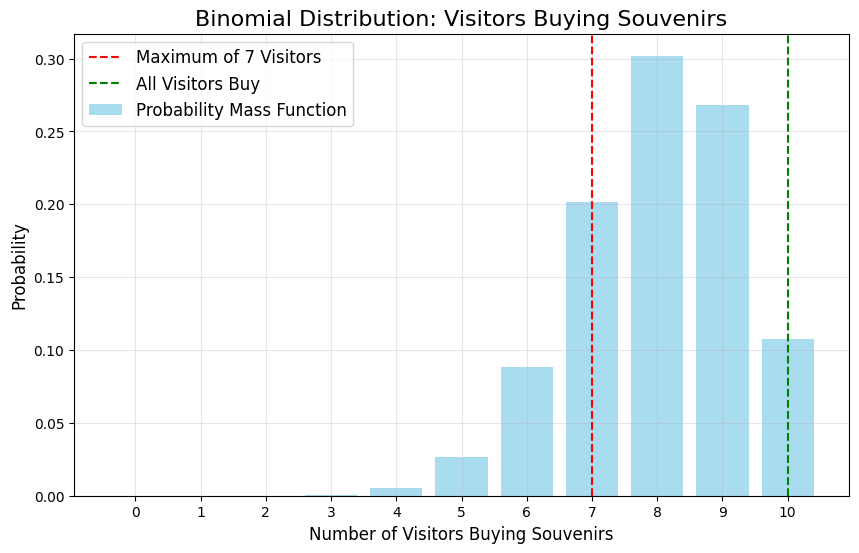

In [26]:
# Plot the binomial distribution
plt.figure(figsize=(10, 6))
plt.bar(x, y, color='skyblue', alpha=0.7, label='Probability Mass Function')
plt.axvline(x=7, color='red', linestyle='--', label='Maximum of 7 Visitors')
plt.axvline(x=10, color='green', linestyle='--', label='All Visitors Buy')
plt.title('Binomial Distribution: Visitors Buying Souvenirs', fontsize=16)
plt.xlabel('Number of Visitors Buying Souvenirs', fontsize=12)
plt.ylabel('Probability', fontsize=12)
plt.xticks(range(0, n + 1))
plt.legend(fontsize=12)
plt.grid(alpha=0.3)
plt.show()